# TODO 

- [ ] Texto explicativo inconsistências e redução de ruído
- [ ] Histogramas por classe de flor
----------

# Avaliação 01 - Introdução ao Aprendizado de Máquina (ENGG67)
**Alunos:**

- **Daniel da Rocha Carneiro**

- **Maurício dos Santos de Jesus**

- **Theo Farias**

----------

O primeiro passo foi realizar a importação das bibliotecas e da base de dados utilizada para análise.

In [29]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Carregando o conjunto de dados e criando o dataframe
iris = load_iris()
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df.head(5)



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### a) Caracterize os dados quanto ao Tipo e Escala

#### Tipo

Verificou-se que das 5 colunas referente a dados, uma delas é do tipo categórica, pois é referente a classe da flor, enquanto as outras quatro são quantitativas, pois representam medidas físicas de aspectos da flor.

#### Escala

Quanto a escala, os dados quantitativos são do tipo racionais, pois possuem significado absoluto referente ao tamanho das características das flores. Já a classe da flor tem característica nominal.

Em termos de formatação, os dados quantitativos estão no formato de ponto flutuante de 64bits.

In [30]:

# a. Caracterizando os dados quanto ao Tipo e Escala
print("Tipo dos dados:\n", type(iris['data']))
print("Escala dos dados:\n", iris['data'].dtype)



Tipo dos dados:
 <class 'numpy.ndarray'>
Escala dos dados:
 float64


### b) O conjunto de dados é univariado ou multivariado?

Determinou-se que os objetos são multivariados por possuirem mais de um atributo.

In [31]:

# b. Determinando se o conjunto de dados é univariado ou multivariado
if len(iris['feature_names']) == 1:
    print("O conjunto de dados é univariado.")
else:
    print("O conjunto de dados é multivariado.")

O conjunto de dados é multivariado.


### c) Verifique a necessidade de balanceamento dos dados e carcarterize estatisticamente os dados

Foi verificado que não há necessidade de balanceamento de dados, pois cada classe possui quantidades equivalentes de exemplos.

Em seguida, caracterizou-se os dados estatisticamente em relação a:

- Quantidade
- Média
- Desvio padrão
- Máximos e mínimos
- Quartis e percentis


In [32]:

# c. Verificando a necessidade de balanceamento dos dados e caracterizando estatisticamente os dados
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
print("Número de exemplos por classe:\n", df['target'].value_counts())

# Estatísticas descritivas para cada classe
for i in np.unique(df['target']):
    print(f"\nClasse {i}:\n", df[df['target'] == i].describe())


Número de exemplos por classe:
 target
0    50
1    50
2    50
Name: count, dtype: int64

Classe 0:
        sepal length (cm)  sepal width (cm)  petal length (cm)   
count           50.00000         50.000000          50.000000  \
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  target  
count         50.000000    50.0  
mean           0.246000     0.0  
std            0.105386     0.0  
min            0.100000     0.0  
25%            0.200000     0.0  
50%            0.200000     0.0  
75%            0.300000     0.0  
max            0.600000     0.0  

Classe

### d) Analise os dados quanto à sua incompletude, inconsistências, redundâncias e presença de ruído

Verificou-se que os dados são bastante completos e com poucas redundâncias ou exemplos duplicados.

Quanto a inconsistências e presença de ruído

In [33]:

# d. Analisando os dados quanto à sua incompletude, inconsistências, redundâncias e presença de ruído
print("Número de valores nulos em cada coluna:\n", df.isnull().sum())
print("\nNúmero de valores duplicados:\n", df.duplicated().sum())
print("\nCorrelação entre as variáveis:\n", df.corr())


Número de valores nulos em cada coluna:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Número de valores duplicados:
 1

Correlação entre as variáveis:
                    sepal length (cm)  sepal width (cm)  petal length (cm)   
sepal length (cm)           1.000000         -0.117570           0.871754  \
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  



### e) Promova uma transformação de dados consistente com o banco sob análise

Através da biblioteca Scikit-learn, utilizou-se a função PCA para realizar uma transformação PCA aos dados originais com o objetivo de reduzir sua dimensionalidade. Os dados transformados foram armazenados em novo DataFrame do Pandas (df_transformed), onde cada exemplo passa a ser representado por suas duas primeiras componentes principais (PC1 e PC2).


In [34]:

# e. Promovendo uma transformação de dados consistente com o banco sob análise
X = iris['data']
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)
df_transformed = pd.DataFrame(data=X_transformed, columns=['PC1', 'PC2'])
df_transformed['target'] = iris['target']
df_transformed.head(5)

,PC1,PC2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0



### f) Utilize a análise de componentes principais (PCA) para gerar gráficos no espaço de atributos

Através da análise de componentes principais, gerou-se alguns gráficos no espaço de atributos para visualizar como os dados estão caracterizados.

#### Gráfico de dispersão

Elaborou-se um gráfico de dispersão relacionando os PCAs PC1 e PC2 em função de suas classes.

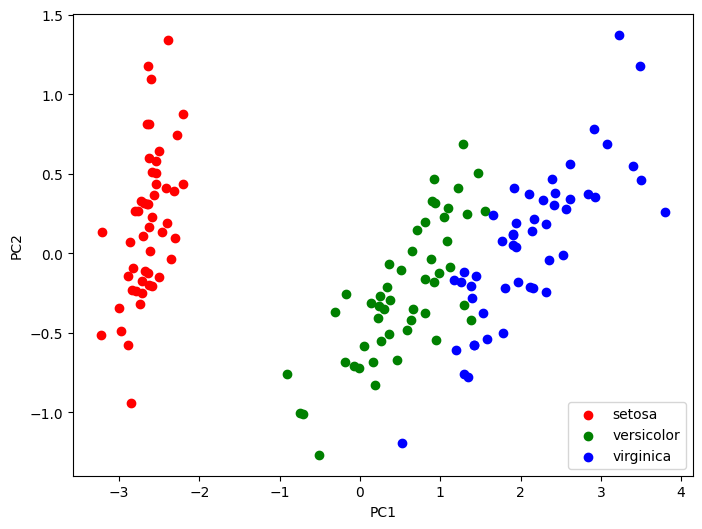

In [35]:

# f. Utilizando a análise de componentes principais (PCA) para gerar gráficos no espaço de atributos
colors = ['red', 'green', 'blue']
species = ['setosa', 'versicolor', 'virginica']

fig, ax = plt.subplots(figsize=(8,6))
for i in range(len(colors)):
    x = df_transformed[df_transformed['target']==i]['PC1']
    y = df_transformed[df_transformed['target']==i]['PC2']
    ax.scatter(x, y, color=colors[i], label=species[i])
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.show()



#### Histogramas de frequência

Através de histogramas de frequência, pode-se analisar as tendências dos dados em função dos parâmetros analisados.

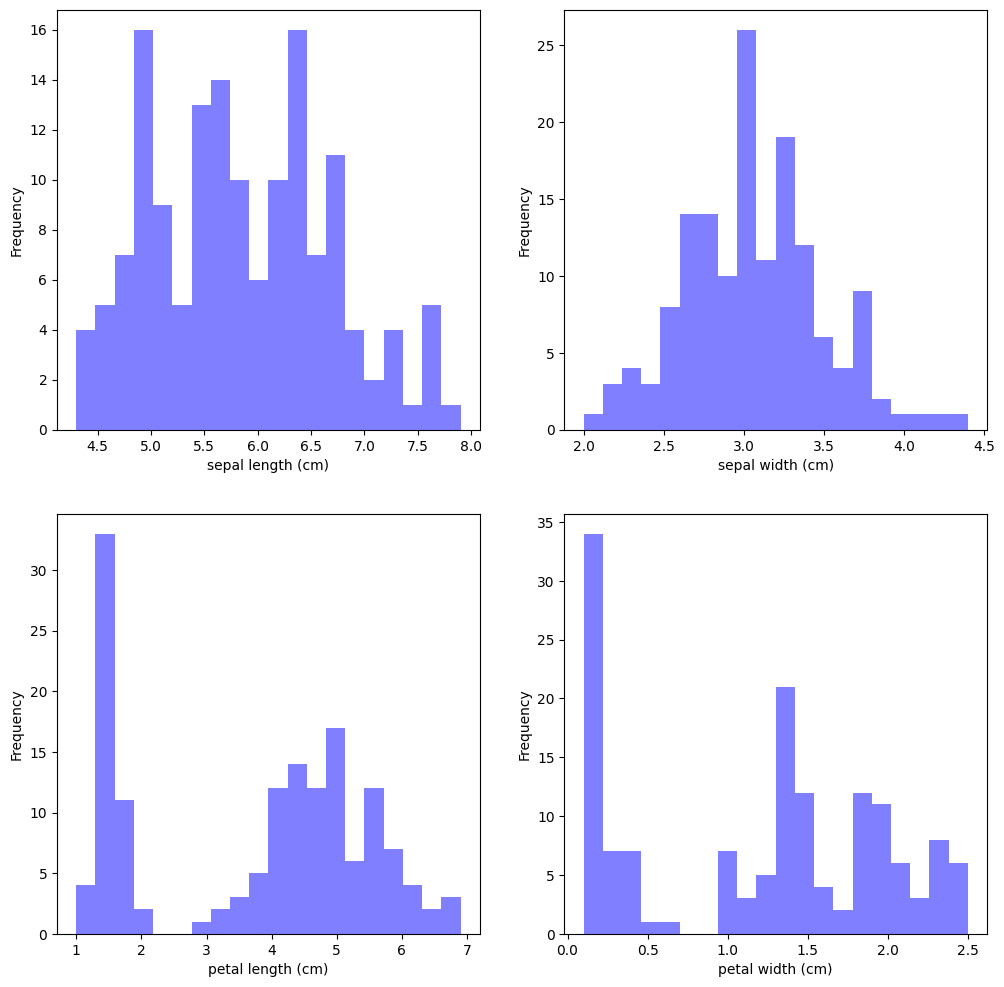

In [36]:

fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs = axs.ravel()
for i, feature_name in enumerate(iris.feature_names):
    axs[i].hist(df[feature_name], bins=20, color='blue', alpha=0.5)
    axs[i].set_xlabel(feature_name)
    axs[i].set_ylabel('Frequency')

plt.show()


#### Boxplot

Através do gráfico Boxplot, é possível verificar a dispersão das medidas para cada uma das características, nas quais:


|    **-**   |     **1**    |    **2**    |     **3**    |    **4**    |
|:----------:|:------------:|:-----------:|:------------:|:-----------:|
| **Atributo** | sepal length | sepal width | petal length | petal width |

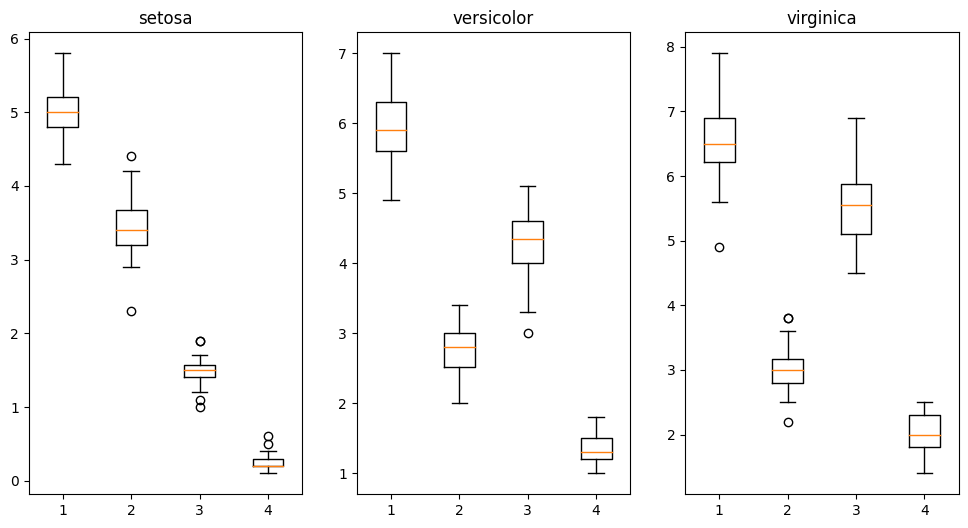

                        1                 2                  3   
classe  sepal length (cm)  sepal width (cm)  petal length (cm)  \

                       4  
classe  petal width (cm)  


In [37]:
fig, axs = plt.subplots(1, 3, figsize=(12,6))
for i in range(len(species)):
    axs[i].boxplot(df[df['target']==i].iloc[:,:-1], labels=[1, 2, 3, 4])
    axs[i].set_title(species[i])

plt.show()

labelTabel = [iris.feature_names]
labelDf = pd.DataFrame(labelTabel, columns = ['1', '2', '3', '4'], index=['classe'])
print(labelDf)